In [25]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

genes = ['gene' + str(i) for i in range(1,101)]
wt=['wt'+str(i) for i in range(1,6)]
ko=['ko'+str(i) for i in range(1,6)]
data = pd.DataFrame(columns=[*wt,*ko],index=genes)

In [26]:
for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000),size=5)
    data.loc[gene,'ko1':'ko5'] =  np.random.poisson(lam=rd.randrange(10,1000),size=5)

In [27]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,90,80,106,83,99,121,131,127,148,144
gene2,774,779,822,817,803,485,523,531,513,506
gene3,202,202,215,174,206,845,882,879,895,849
gene4,699,696,680,637,622,687,726,744,748,803
gene5,928,927,898,853,929,315,344,298,313,311


In [28]:
data.shape

(100, 10)

In [29]:
scaled_data = preprocessing.scale(data.T) # Transposing data and scaling
#ALternative StandardScaler.fit_transform(data.T)

In [30]:
pca=PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

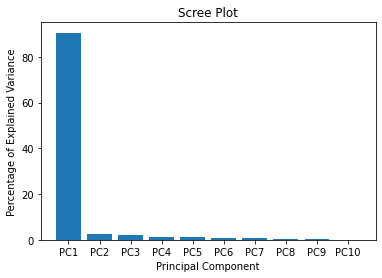

In [31]:
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = ['PC' +str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

Text(0, 0.5, 'PC1 - 2.5%')

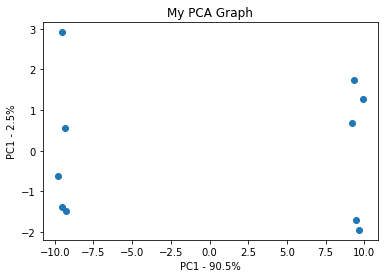

In [32]:
pca_df = pd.DataFrame(pca_data, index=[*wt,*ko],columns=labels)
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC1 - {0}%'.format(per_var[1]))

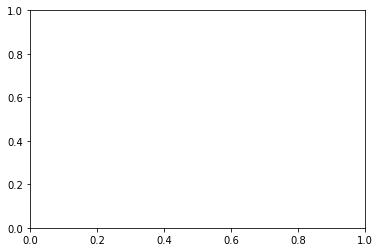

In [33]:
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()